In [33]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [34]:
df=pd.read_csv("data.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


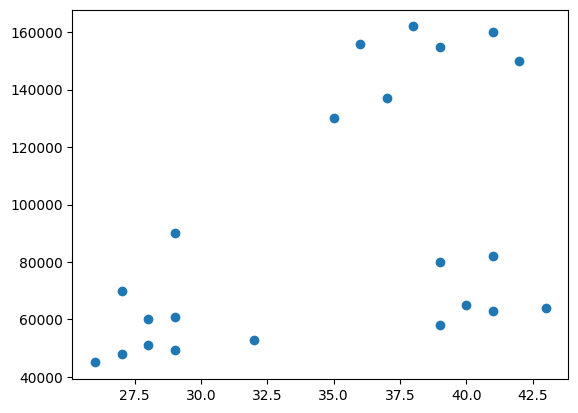

In [35]:
plt.scatter(df['Age'],df['Income($)'])

In [36]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [37]:
perdicted=km.fit_predict(df[['Age','Income($)']])
perdicted

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [38]:
df['Pre']  = perdicted
df.head()

,Name,Age,Income($),Pre
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


Text(0, 0.5, 'Income($)')

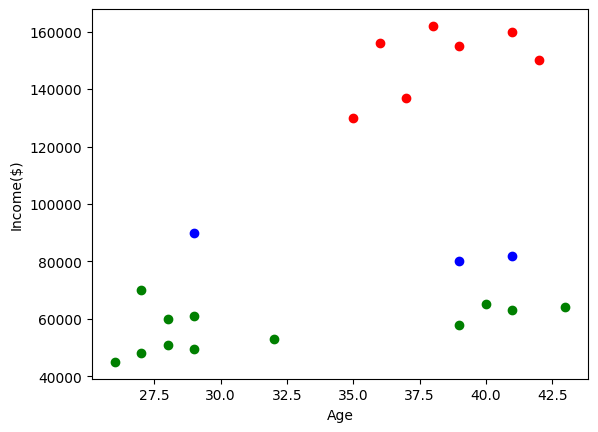

In [39]:
df1 = df[df.Pre==0]
df2 = df[df.Pre==1]
df3 = df[df.Pre==2]

plt.scatter(df1.Age,df1['Income($)'],color='red')
plt.scatter(df2.Age,df2['Income($)'],color='green')
plt.scatter(df3.Age,df3['Income($)'],color='blue')

plt.xlabel('Age')
plt.ylabel('Income($)')

In [40]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])


df.head()

,Name,Age,Income($),Pre
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


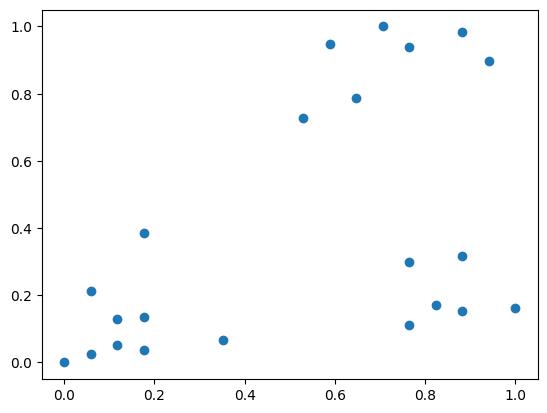

In [41]:
plt.scatter(df['Age'],df['Income($)'])

In [42]:
perdicted=km.fit_predict(df[['Age','Income($)']])
perdicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [43]:
df['Pre']  = perdicted
df.head()

,Name,Age,Income($),Pre
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


Text(0, 0.5, 'Income($)')

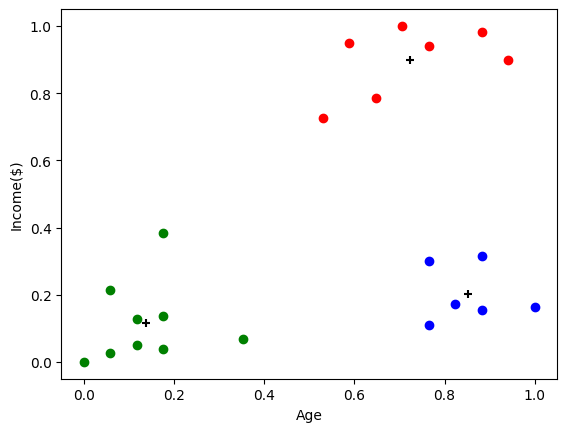

In [44]:
df1 = df[df.Pre==0]
df2 = df[df.Pre==1]
df3 = df[df.Pre==2]

plt.scatter(df1.Age,df1['Income($)'],color='red')
plt.scatter(df2.Age,df2['Income($)'],color='green')
plt.scatter(df3.Age,df3['Income($)'],color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='+',color='black')

plt.xlabel('Age')
plt.ylabel('Income($)')


In [45]:
k_rng=range(1,11)
sse=[]
for i  in k_rng:
    km = KMeans(n_clusters=i)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.2766936276300279,
 0.2522119125653639,
 0.18850242078456822,
 0.16547589166256546,
 0.10629897421405132,
 0.08765995150300003]

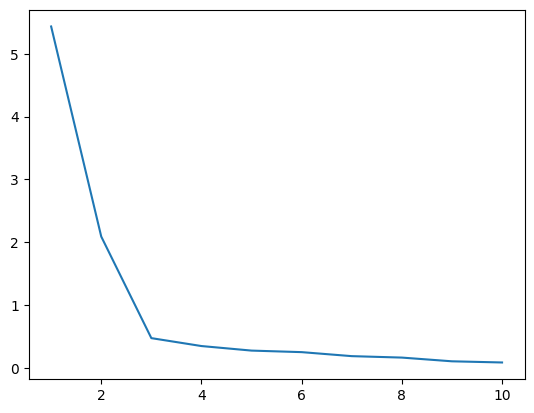

In [49]:
plt.plot(k_rng,sse)